In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
WINDOW_SIZE = 120
BATCH_SIZE = 1
N_EPOCHS = 10
PATH = 'data/sunspots.csv'

In [3]:
def load_data(path):
    df = pd.read_csv(path)
    df.columns = ['x', 'date', 'monthly_mean_sunspots']
    df = df.set_index('date')
    df = df['monthly_mean_sunspots']
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    df = df.asfreq('ME')
    return df

df = load_data(PATH)

time = df.index
series = df.values

In [4]:
test_size = 800
val_size = 200

train_val_series, train_val_time = series[:-test_size], time[:-test_size]
test_series, test_time = series[-test_size:], time[-test_size:]

train_series, train_time = train_val_series[:-val_size], train_val_time[:-val_size]
val_series, val_time = train_val_series[-val_size:], train_val_time[-val_size:]
 
train_series = train_series.reshape((len(train_series), 1))
val_series = val_series.reshape((len(val_series), 1))
test_series  = test_series.reshape((len(test_series), 1))

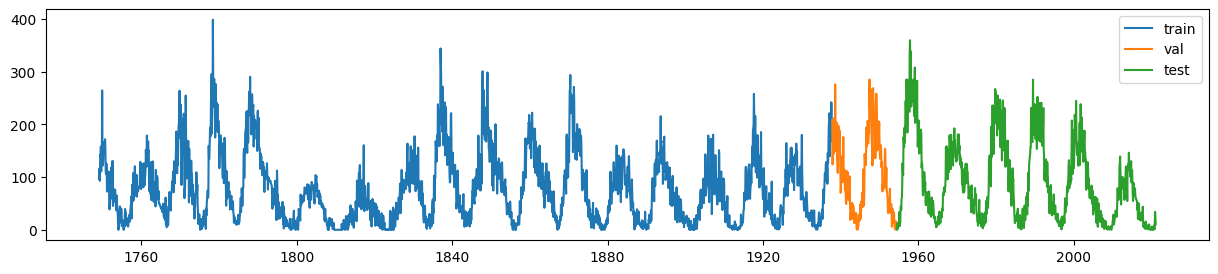

In [5]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(train_time, train_series, label='train')
ax.plot(val_time, val_series, label='val')
ax.plot(test_time, test_series, label='test')
ax.legend()
plt.show()

In [6]:
train_generator = TimeseriesGenerator(
    train_series, 
    train_series,
    length=WINDOW_SIZE, 
    sampling_rate=1,
    stride=1,
    batch_size=BATCH_SIZE
)

val_generator = TimeseriesGenerator(
    val_series, 
    val_series,
    length=WINDOW_SIZE, 
    sampling_rate=1,
    stride=1,
    batch_size=BATCH_SIZE
)

test_generator = TimeseriesGenerator(
    test_series, 
    test_series,
    length=WINDOW_SIZE, 
    sampling_rate=1,
    stride=1,
    batch_size=BATCH_SIZE
)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.LSTM(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [8]:
history = model.fit(train_generator, validation_data=val_generator, epochs=N_EPOCHS, verbose=1)

Epoch 1/10
  1/429 ━━━━━━━━━━━━━━━━━━━━ 55:04 8s/step - loss: 4049.4219

c:\users\robet\venvs\.deepl\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


429/429 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - loss: 6887.1182 - val_loss: 11124.0459
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 6901.7861 - val_loss: 10413.4404
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 6996.2480 - val_loss: 10802.9814
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 6997.2607 - val_loss: 9926.9746
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 6853.3584 - val_loss: 9458.6543
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - loss: 6525.3672 - val_loss: 11140.8193
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - loss: 6764.3667 - val_loss: 10968.2793
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - loss: 6633.6738 - val_loss: 11896.1758
Epoch 9/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - loss: 7020.6450 - val_loss: 10862.1553
Epoch 10/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 5968.7549 - val_loss: 11277.9688


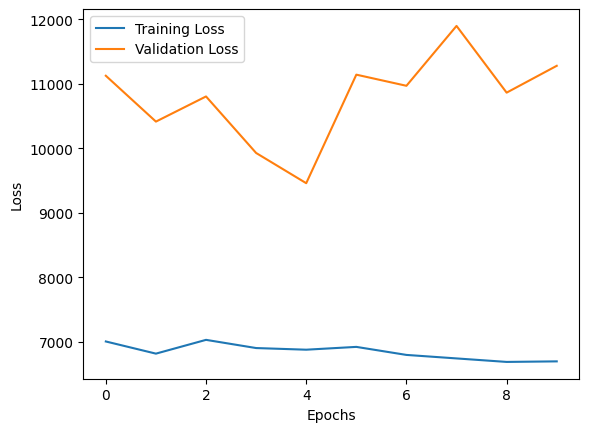

In [9]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend()
plt.show()

In [10]:
test_predictions = model.predict(test_generator)
train_predictions = model.predict(train_generator)

136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
429/429 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step


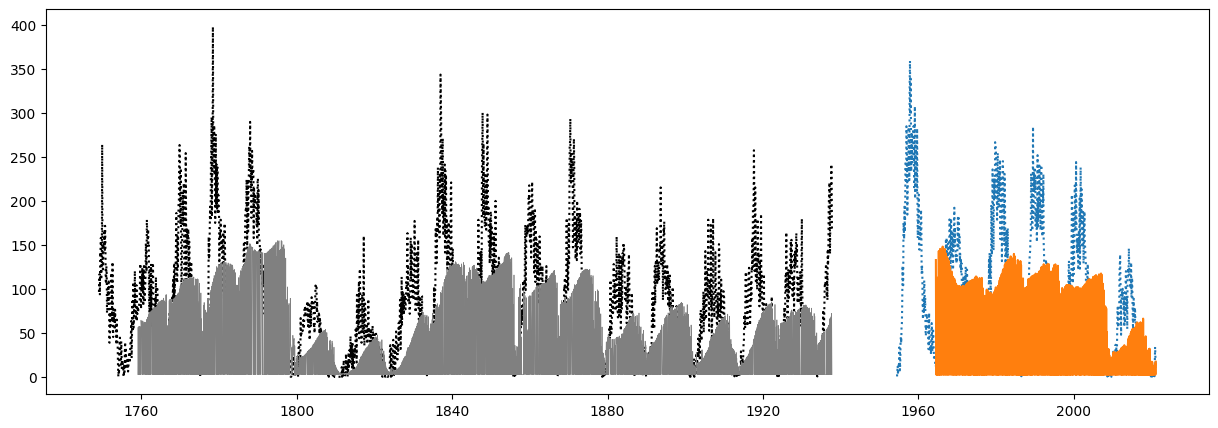

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train_time, train_series, ':', color='black', label='y_train')
ax.plot(train_time[WINDOW_SIZE:], train_predictions, color='gray', linewidth=0.5, label='y_train_pred')

ax.plot(test_time, test_series, ':')
ax.plot(test_time[WINDOW_SIZE:], test_predictions)
plt.show()

In [12]:
ypred = []
ytest = []
for batch in test_ds:
    inputs, targets = batch
    ypred_batch = model.predict(inputs, verbose=0)
    ypred.extend(ypred_batch.flatten())
    ytest.extend(targets.numpy().flatten())

NameError: name 'test_ds' is not defined

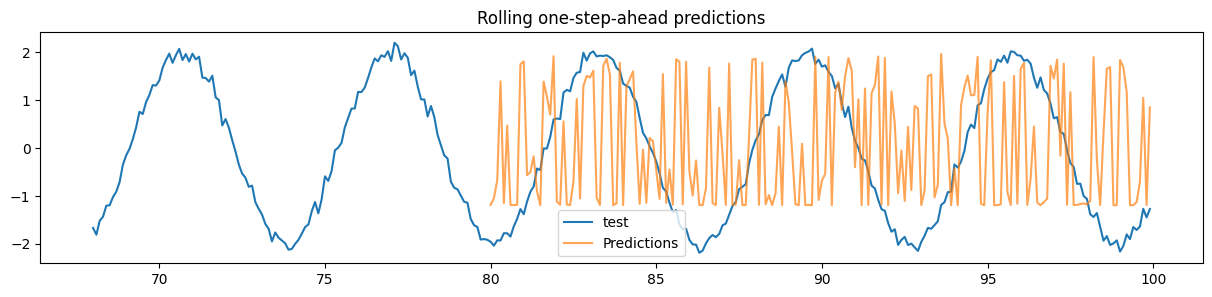

In [72]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(test_time, test_series, label='test')
ax.plot(test_time[WINDOW_SIZE:], ypred, label='Predictions', alpha=0.7)
ax.legend()
ax.set_title('Rolling one-step-ahead predictions')
plt.show()